In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from datetime import datetime, timedelta
import numpy as np

plt.style.use('seaborn-v0_8-whitegrid')

In [2]:
import os
import sys

root_folder = os.path.dirname(os.path.abspath(os.getcwd()))
fetching_data_module_folder = root_folder + "\\fetch_data"

sys.path.insert(0, fetching_data_module_folder)

from fetching_meteorological import meteorological_df

In [3]:
df = meteorological_df(include_missing_date=True)

This option should be set for the purpose of visualization
If you just want to fetch meteorological data for training, set the parameter include_missing_data to False


In [4]:
df

,time,ID,pm25,lat,lon,SQRT_SEA_DEM_LAT,WSPD,WDIR,TMP,TX,TN,TP,RH,PRES2M
15382,2020-01-01,5,NaN,21.021300,105.850900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,2020-01-01,19,116.949130,21.049750,105.741870,5.922647,1.136119,145.942749,20.811243,23.219995,18.939997,0.375,74.750000,102197.203125
12043,2020-01-01,51,NaN,21.200344,105.948544,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12202,2020-01-01,52,NaN,21.123247,106.288330,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12347,2020-01-01,53,NaN,21.152745,106.111371,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11504,2021-12-31,172,17.153631,20.927000,106.314000,4.784339,1.322285,353.486359,17.187494,18.839991,15.249994,0.000,63.812500,102335.617188
11505,2021-12-31,173,11.901323,20.977400,106.430800,4.589203,0.235641,347.438232,17.732492,19.739985,15.609980,0.000,65.050003,102115.812500
18456,2021-12-31,175,NaN,21.116400,106.385600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11506,2021-12-31,195,24.209832,21.338470,105.367300,5.228505,1.295622,97.865257,16.122246,17.824003,14.982986,0.000,70.632500,101743.898438


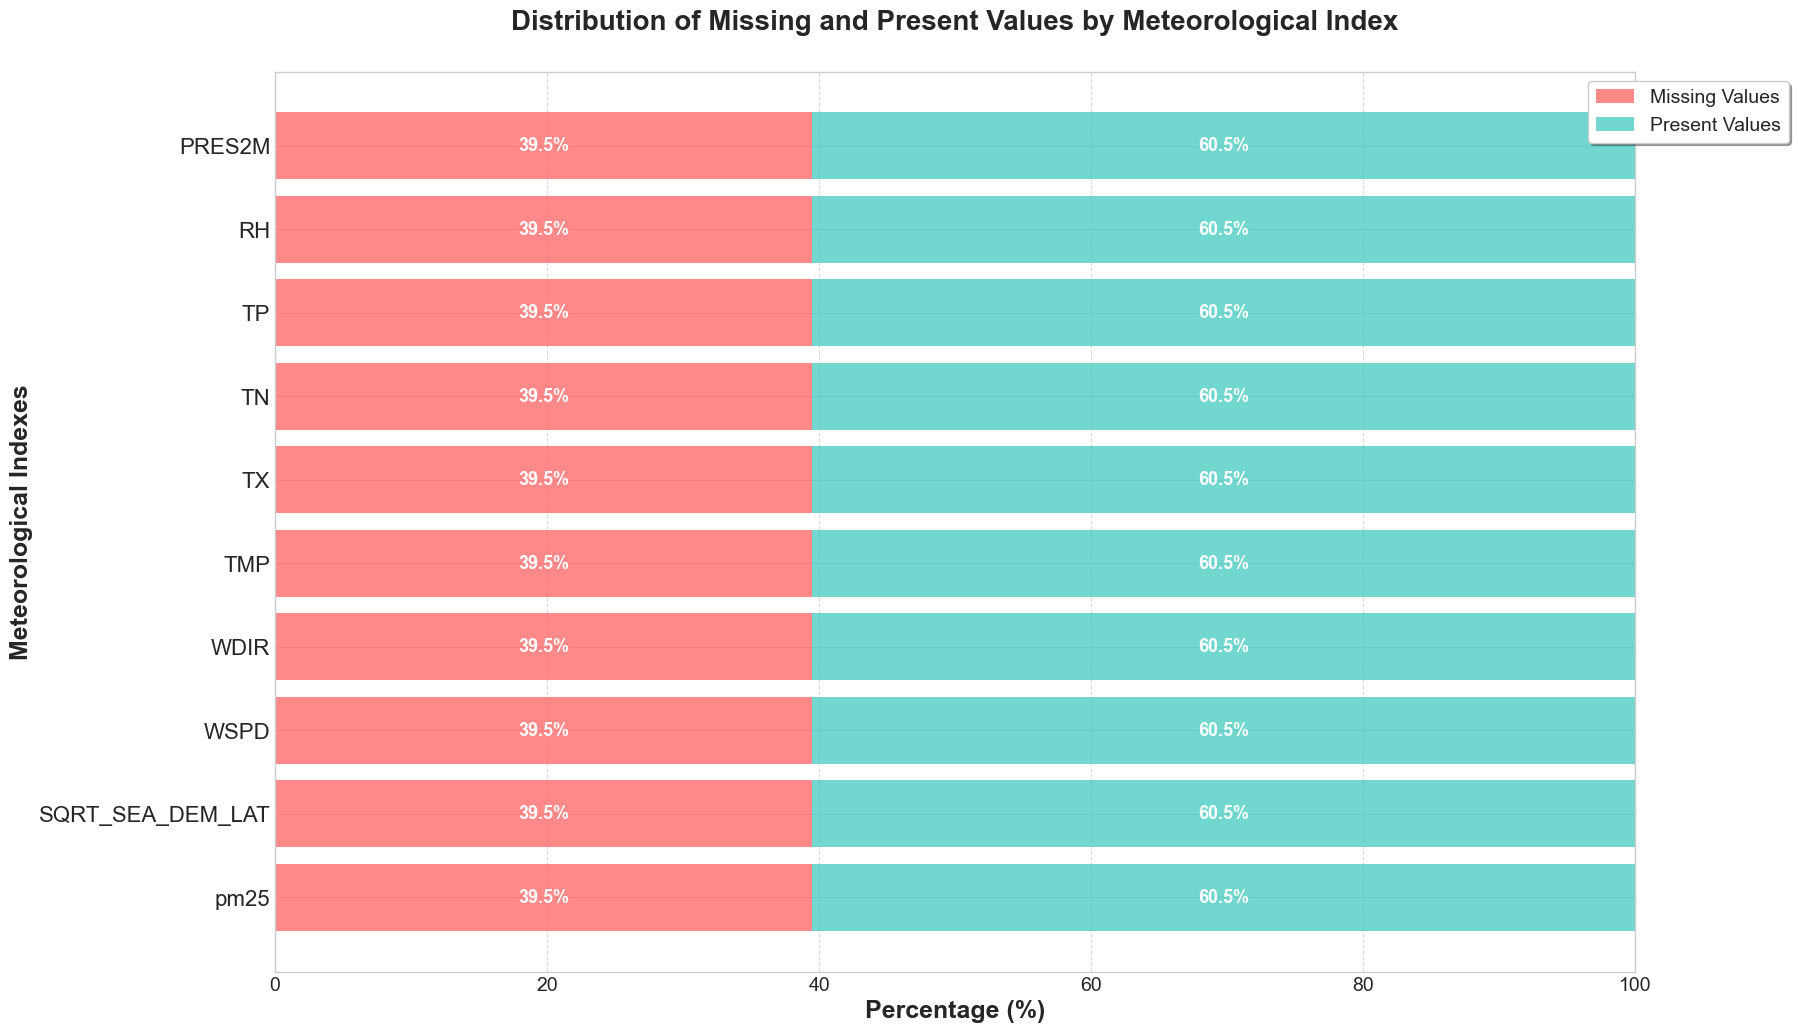

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Chuẩn bị dữ liệu
tmp_df = df.drop(['lon', 'lat', 'time', 'ID'], axis=1)
total_rows = len(tmp_df)
missing_counts = tmp_df.isna().sum()
missing_percent = (missing_counts / total_rows * 100).round(2)
non_missing_percent = 100 - missing_percent

# Số lượng chỉ số trên trục y
num_indices = len(missing_percent)

# Tính chiều cao của biểu đồ dựa trên số lượng chỉ số (1.2 là chiều cao mỗi thanh)
fig_height = num_indices * 1.2
plt.figure(figsize=(20, fig_height))  # Chiều rộng cố định là 20

# Sắp xếp các chỉ số theo phần trăm giá trị missing
sorted_indices = missing_percent.sort_values(ascending=True).index
y_pos = np.arange(len(sorted_indices))

# Vẽ các thanh ngang
plt.barh(y_pos, missing_percent[sorted_indices], color='#FF6B6B', alpha=0.8, 
         label='Missing Values', height=0.8)
plt.barh(y_pos, non_missing_percent[sorted_indices], left=missing_percent[sorted_indices], 
         color='#4ECDC4', alpha=0.8, label='Present Values', height=0.8)

# Đặt giới hạn trục x để đảm bảo độ dài thanh ngang đồng bộ
plt.xlim(0, 100)

# Định dạng trục y và labels
plt.yticks(y_pos, sorted_indices, fontsize=16)
plt.xticks(fontsize=14)
plt.xlabel('Percentage (%)', fontsize=18, fontweight='bold')
plt.ylabel('Meteorological Indexes', fontsize=18, fontweight='bold')

# Tiêu đề với khoảng cách và định dạng
plt.title('Distribution of Missing and Present Values by Meteorological Index', 
          fontsize=20, fontweight='bold', pad=30)

# Đặt legend phía trên bên phải, bên ngoài biểu đồ
plt.legend(loc='upper right', bbox_to_anchor=(1.12, 1.0), 
           frameon=True, fancybox=True, shadow=True, fontsize=14)

# Thêm grid để dễ đọc
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Thêm nhãn phần trăm với màu sắc tương phản
for i, pos in enumerate(y_pos):
    if missing_percent[sorted_indices[i]] > 5:
        plt.text(missing_percent[sorted_indices[i]]/2, pos, 
                f'{missing_percent[sorted_indices[i]]:.1f}%', 
                ha='center', va='center', color='white', fontweight='bold', fontsize=13)
    if non_missing_percent[sorted_indices[i]] > 5:
        plt.text(missing_percent[sorted_indices[i]] + non_missing_percent[sorted_indices[i]]/2, pos,
                f'{non_missing_percent[sorted_indices[i]]:.1f}%', 
                ha='center', va='center', color='white', fontweight='bold', fontsize=13)

# Điều chỉnh layout để đồng bộ không gian
plt.tight_layout()
plt.subplots_adjust(left=0.2, right=0.88, top=0.85, bottom=0.1)  # Đồng bộ các lề

plt.show()

c:\Application\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Application\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\CA_UOP_MUOI\AppData\Local\Temp\ipykernel_19988\26873877.py:22: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df_normalized[col], label=col, color=color_palette[i], linewidth=2.5, alpha=0.7)
c:\Application\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN be

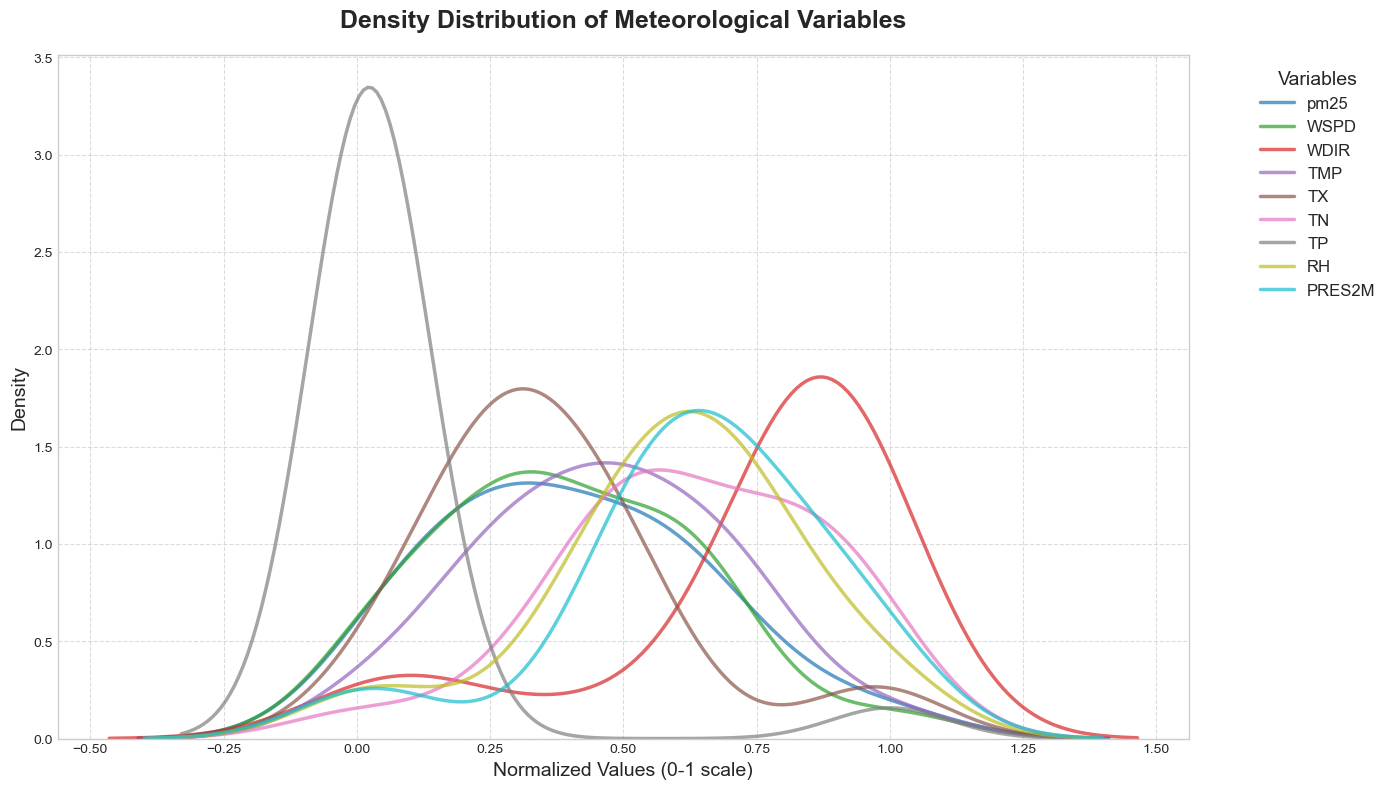

In [6]:
from sklearn.preprocessing import MinMaxScaler

df_cleaned = df.dropna(axis=0)
df_stats = df.drop(['lon', 'lat', 'time', 'ID'], axis=1).loc[df['ID'] == 5]

# Chuẩn hóa dữ liệu
scaler = MinMaxScaler()
df_normalized = pd.DataFrame(
    scaler.fit_transform(df_stats), 
    columns=df_stats.columns
)

# Thiết lập style và kích thước
plt.figure(figsize=(14, 8))
plt.style.use('seaborn-v0_8-whitegrid')

# Tạo bảng màu đẹp hơn
color_palette = sns.color_palette("tab10", n_colors=len(df_stats.columns))

# Vẽ density plot cho từng biến trong một đồ thị tổng
for i, col in enumerate(df_normalized.columns):
    sns.kdeplot(df_normalized[col], label=col, color=color_palette[i], linewidth=2.5, alpha=0.7)

# Thiết lập tiêu đề và nhãn trục
plt.title('Density Distribution of Meteorological Variables', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Normalized Values (0-1 scale)', fontsize=14)
plt.ylabel('Density', fontsize=14)

# Cải thiện legend
plt.legend(title='Variables', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title_fontsize=14)

# Thêm grid để dễ đọc
plt.grid(True, linestyle='--', alpha=0.7)

# Thêm khung viền và điều chỉnh bố cục
plt.tight_layout()
plt.show()